In [1]:
import pandas as pd
import numpy as np
import numpy as np
import seaborn as sns
from sklearn import datasets, linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline 

In [2]:
Data_train=pd.read_csv('./titanic/train.csv')

In [3]:
Data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
Data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
Data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# 填補Age的缺失值

In [6]:
Data_train.corrwith(Data_train['Age'])

PassengerId    0.036847
Survived      -0.077221
Pclass        -0.369226
Age            1.000000
SibSp         -0.308247
Parch         -0.189119
Fare           0.096067
dtype: float64

In [7]:
Data_train.groupby('Pclass')['Age'].median()
Data_train['Age']=Data_train.groupby(['Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))

In [8]:
Data_train.dropna(subset=['Embarked'],inplace=True)

In [9]:
Data_train['Cabin'].fillna('X',inplace=True)

# 處理Feature

In [10]:
Data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,X,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,X,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,X,S


In [11]:
Data_train['Title']=Data_train['Name'].apply(lambda x: x.split()[1][:-1])

In [12]:
Title_Dictionary = {
    "Mme": "Mrs",
    "Mlle": "Miss",
    "Ms": "Mrs",
    "Mr" : "Mr",
    "Mrs" : "Mrs",
    "Miss" : "Miss",
    "Master" : "Master",
}

In [13]:
def alterTitle(x):
    if x in Title_Dictionary:
        return Title_Dictionary[x]
    else:
        return 'Others'

In [14]:
Data_train['Title']=Data_train['Title'].apply(alterTitle)

In [15]:
Data_train.groupby("Title")['PassengerId'].count().sort_values()

Title
Master     40
Others     45
Mrs       122
Miss      180
Mr        502
Name: PassengerId, dtype: int64

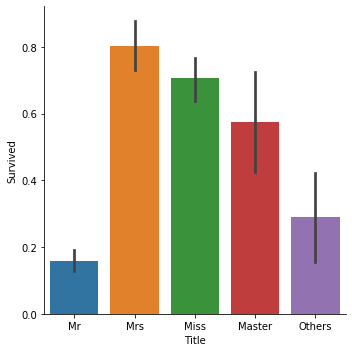

In [16]:
sns.catplot(x='Title',y='Survived',kind='bar',data=Data_train) 

In [17]:
Data_train['Age']=pd.cut(Data_train['Age'],[0,15,25,55,100])

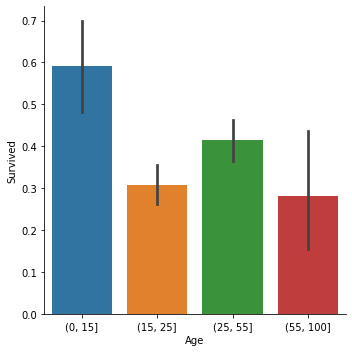

In [18]:
sns.catplot(x='Age',y='Survived',kind='bar',data=Data_train) 

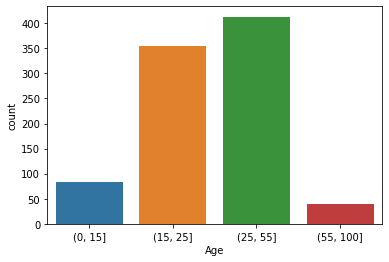

In [19]:
sns.countplot(x='Age',data=Data_train) 

In [20]:
Data_train['Parch']

0      0
1      0
2      0
3      0
4      0
      ..
886    0
887    0
888    2
889    0
890    0
Name: Parch, Length: 889, dtype: int64

In [21]:
Data_train['FamilyNum']=Data_train['SibSp']+Data_train['Parch']+1

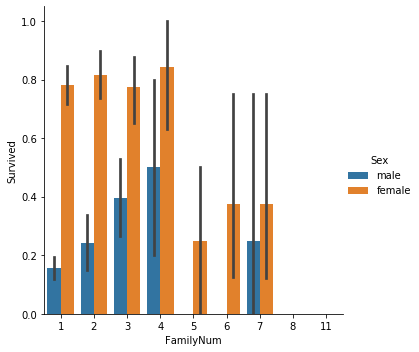

In [22]:
sns.catplot(x='FamilyNum',y='Survived',hue='Sex',kind='bar',data=Data_train) 

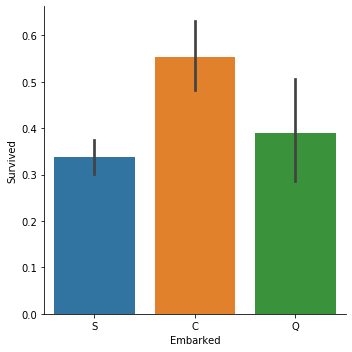

In [23]:
sns.catplot(x='Embarked',y='Survived',kind='bar',data=Data_train) 

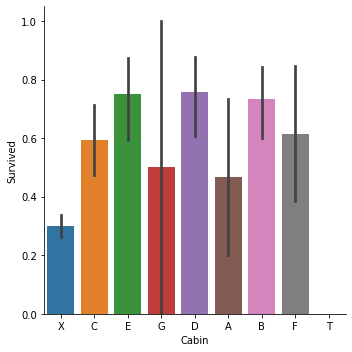

In [24]:
Data_train['Cabin']=Data_train['Cabin'].apply(lambda x:  x[0])
sns.catplot(x='Cabin',y='Survived',kind='bar',data=Data_train) 

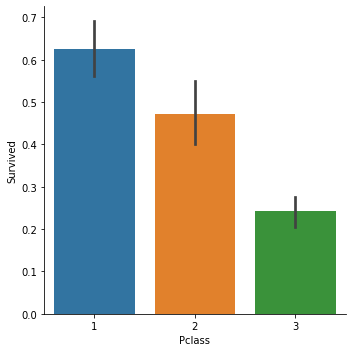

In [25]:
sns.catplot(x='Pclass',y='Survived',kind='bar',data=Data_train) 

In [26]:
Data_train['Fare']=pd.cut(Data_train['Fare'], [-0.001,10.5,56.558,1000],labels=['low','medium','high'])

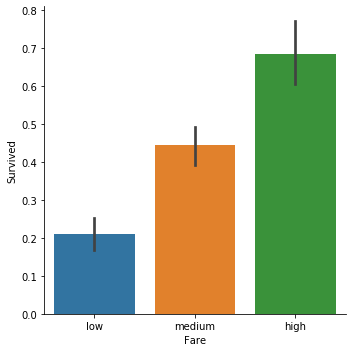

In [27]:
sns.catplot(x='Fare',y='Survived',kind='bar',data=Data_train) 

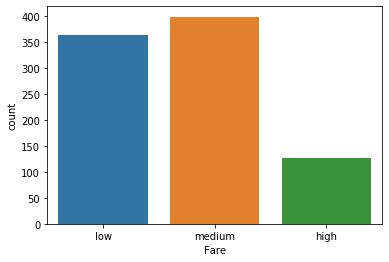

In [28]:
sns.countplot(x='Fare',data=Data_train) 

## 選定Feature: 1.類別資料:['Pclass','Sex','Age','Title','Fare',FamilyNum]`

In [29]:
Data_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilyNum
0,1,0,3,"Braund, Mr. Owen Harris",male,"(15, 25]",1,0,A/5 21171,low,X,S,Mr,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,"(25, 55]",1,0,PC 17599,high,C,C,Mrs,2
2,3,1,3,"Heikkinen, Miss. Laina",female,"(25, 55]",0,0,STON/O2. 3101282,low,X,S,Miss,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,"(25, 55]",1,0,113803,medium,C,S,Mrs,2
4,5,0,3,"Allen, Mr. William Henry",male,"(25, 55]",0,0,373450,low,X,S,Mr,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,"(25, 55]",0,0,211536,medium,X,S,Others,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,"(15, 25]",0,0,112053,medium,B,S,Miss,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,"(15, 25]",1,2,W./C. 6607,medium,X,S,Miss,4
889,890,1,1,"Behr, Mr. Karl Howell",male,"(25, 55]",0,0,111369,medium,C,C,Mr,1


In [30]:
Data_train=Data_train[['Survived','Pclass','Sex','Age','Title','Fare','FamilyNum']]
Data_train

,Survived,Pclass,Sex,Age,Title,Fare,FamilyNum
0,0,3,male,"(15, 25]",Mr,low,2
1,1,1,female,"(25, 55]",Mrs,high,2
2,1,3,female,"(25, 55]",Miss,low,1
3,1,1,female,"(25, 55]",Mrs,medium,2
4,0,3,male,"(25, 55]",Mr,low,1
...,...,...,...,...,...,...,...
886,0,2,male,"(25, 55]",Others,medium,1
887,1,1,female,"(15, 25]",Miss,medium,1
888,0,3,female,"(15, 25]",Miss,medium,4
889,1,1,male,"(25, 55]",Mr,medium,1


In [31]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
Data_train['Sex']=labelencoder.fit_transform(Data_train.iloc[:, 2])
Data_train['Age']=labelencoder.fit_transform(Data_train.iloc[:, 3])
Data_train['Title']=labelencoder.fit_transform(Data_train.iloc[:, 4])
Data_train['Fare']=labelencoder.fit_transform(Data_train.iloc[:, 5])

C:\Users\highs\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\highs\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\highs\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

In [32]:
Data_train

,Survived,Pclass,Sex,Age,Title,Fare,FamilyNum
0,0,3,1,1,2,1,2
1,1,1,0,2,3,0,2
2,1,3,0,2,1,1,1
3,1,1,0,2,3,2,2
4,0,3,1,2,2,1,1
...,...,...,...,...,...,...,...
886,0,2,1,2,4,2,1
887,1,1,0,1,1,2,1
888,0,3,0,1,1,2,4
889,1,1,1,2,2,2,1


# cross validation

In [33]:
X=Data_train.drop('Survived',axis=1)
y=Data_train['Survived']

In [34]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression( C=1)
scores = cross_val_score(clf, X, y, cv=5)
print('LogisticRegression 平均準確率:'+str(scores.mean()))

LogisticRegression 平均準確率:0.7896654605471973


In [35]:
from sklearn.model_selection import cross_val_score
from sklearn import svm
clf = svm.SVC(kernel='linear', C=1)
scores = cross_val_score(clf, X, y, cv=5)
print('SVM(linear) 平均準確率:'+str(scores.mean()))

SVM(linear) 平均準確率:0.7862756300387227


In [36]:
from sklearn.model_selection import cross_val_score
from sklearn import svm
clf = svm.SVC(kernel='rbf', C=1)
scores = cross_val_score(clf, X, y, cv=5)
print('SVM(rbf) 平均準確率:'+str(scores.mean()))

SVM(rbf) 平均準確率:0.8324382657271631


In [37]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=1)
#cv = StratifiedKFold(y, random_state=1)        # Setting random_state is not necessary here
scores = cross_val_score(clf, X,y,scoring='accuracy', cv=5)
print('RandomForest 平均準確率:'+str(scores.mean()))

RandomForest 平均準確率:0.80769377261474


In [38]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier()
#cv = StratifiedKFold(y, random_state=1)        # Setting random_state is not necessary here
scores = cross_val_score(clf, X,y,scoring='accuracy', cv=5)
print('GradientBoost 平均準確率:'+str(scores.mean()))

GradientBoost 平均準確率:0.8178061321653018


In [39]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier()
#cv = StratifiedKFold(y, random_state=1)        # Setting random_state is not necessary here
scores = cross_val_score(clf, X,y,scoring='accuracy', cv=5)
print('AdaBoost 平均準確率:'+str(scores.mean()))

AdaBoost 平均準確率:0.8054465816035041


## 使用GradientBoost和SVM (rbf)作為分類的方法

In [40]:
#整個model train一次

In [41]:
Title_Dictionary = {
    "Mme": "Mrs",
    "Mlle": "Miss",
    "Ms": "Mrs",
    "Mr" : "Mr",
    "Mrs" : "Mrs",
    "Miss" : "Miss",
    "Master" : "Master",
}
def alterTitle(x):
    if x in Title_Dictionary:
        return Title_Dictionary[x]
    else:
        return 'Others'

In [42]:
def preprocess(Data,isTrainData):
    #補空值
    Data['Age']=Data.groupby(['Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))
    Data.dropna(subset=['Embarked'],inplace=True)
    Data['Cabin'].fillna('X',inplace=True)
    Data['Title']=Data['Name'].apply(lambda x: x.split()[1][:-1])
    #處理Features
    Data['Title']=Data['Title'].apply(alterTitle)
    Data['Age']=pd.cut(Data['Age'],[0,15,25,55,100])
    Data['FamilyNum']=Data['SibSp']+Data['Parch']+1
    Data['Cabin']=Data['Cabin'].apply(lambda x:  x[0])
    Data['Fare']=pd.cut(Data['Fare'], [-0.001,10.5,56.558,1000],labels=['low','medium','high'])
    #Select Features
    if(isTrainData):
        Data=Data[['Survived','Pclass','Sex','Age','Title','Fare','FamilyNum']]
    else:
        Data=Data[['Pclass','Sex','Age','Title','Fare','FamilyNum']]
    return Data

In [43]:
Data_trainAll=pd.read_csv('./titanic/train.csv')
A=preprocess(Data_trainAll,1)

In [44]:
A

,Survived,Pclass,Sex,Age,Title,Fare,FamilyNum
0,0,3,male,"(15, 25]",Mr,low,2
1,1,1,female,"(25, 55]",Mrs,high,2
2,1,3,female,"(25, 55]",Miss,low,1
3,1,1,female,"(25, 55]",Mrs,medium,2
4,0,3,male,"(25, 55]",Mr,low,1
...,...,...,...,...,...,...,...
886,0,2,male,"(25, 55]",Others,medium,1
887,1,1,female,"(15, 25]",Miss,medium,1
888,0,3,female,"(15, 25]",Miss,medium,4
889,1,1,male,"(25, 55]",Mr,medium,1


In [45]:
from sklearn.preprocessing import LabelEncoder
# creating initial dataframe
Sex ={'female': 0, 'male': 1}
Age= {pd.Interval(15, 25, closed='right'):0, pd.Interval(25, 55, closed='right'):1, pd.Interval(0, 15, closed='right'):2, pd.Interval(55, 100, closed='right'):3}
Title= {'Mr':0, 'Mrs':1, 'Miss':2, 'Master':3, 'Others':4}
Fare= {'low':0, 'high':1, 'medium':2}
A['Sex']=A['Sex'].map( Sex ).astype(int)
A['Age']=A['Age'].map( Age ).astype(int)
A['Title']=A['Title'].map( Title ).astype(int)
A['Fare']=A['Fare'].map( Fare ).astype(int)
A

C:\Users\highs\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\highs\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\highs\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

,Survived,Pclass,Sex,Age,Title,Fare,FamilyNum
0,0,3,1,0,0,0,2
1,1,1,0,1,1,1,2
2,1,3,0,1,2,0,1
3,1,1,0,1,1,2,2
4,0,3,1,1,0,0,1
...,...,...,...,...,...,...,...
886,0,2,1,1,4,2,1
887,1,1,0,0,2,2,1
888,0,3,0,0,2,2,4
889,1,1,1,1,0,2,1


In [46]:
X_train=A.drop('Survived',axis=1)
y_train=A['Survived']

# 1.使用 GradientBoost

In [47]:
model1 = GradientBoostingClassifier()
model1.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [48]:
print('in data 準確率:',model1.score(X_train,y_train))

in data 準確率: 0.8447694038245219


# 2.使用 SVM (rbf)

In [49]:
model2 = svm.SVC(kernel='rbf', C=1)
model2.fit(X_train, y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [50]:
print('in data 準確率:',model2.score(X_train,y_train))

in data 準確率: 0.8335208098987626


# Testing Data

In [51]:
Data_test_orignal=pd.read_csv('./titanic/test.csv')
Data_test=Data_test_orignal.copy()
Data_test=preprocess(Data_test,0)
Data_test

,Pclass,Sex,Age,Title,Fare,FamilyNum
0,3,male,"(25, 55]",Mr,low,1
1,3,female,"(25, 55]",Mrs,low,2
2,2,male,"(55, 100]",Mr,low,1
3,3,male,"(25, 55]",Mr,low,1
4,3,female,"(15, 25]",Mrs,medium,3
...,...,...,...,...,...,...
413,3,male,"(15, 25]",Mr,low,1
414,1,female,"(25, 55]",Others,high,1
415,3,male,"(25, 55]",Mr,low,1
416,3,male,"(15, 25]",Mr,low,1


In [52]:
Data_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Pclass     418 non-null    int64   
 1   Sex        418 non-null    object  
 2   Age        418 non-null    category
 3   Title      418 non-null    object  
 4   Fare       417 non-null    category
 5   FamilyNum  418 non-null    int64   
dtypes: category(2), int64(2), object(2)
memory usage: 17.5+ KB


Fare 有缺值

In [53]:
Data_test['Fare'].groupby(Data_test['Fare']).count()

Fare
low       166
medium    182
high       69
Name: Fare, dtype: int64

In [54]:
Data_test['Fare'].fillna('medium',inplace=True)

In [55]:
Data_test['Sex']=Data_test['Sex'].map( Sex ).astype(int)
Data_test['Age']=Data_test['Age'].map( Age ).astype(int)
Data_test['Title']=Data_test['Title'].map( Title ).astype(int)
Data_test['Fare']=Data_test['Fare'].map( Fare ).astype(int)

In [56]:
Data_test

,Pclass,Sex,Age,Title,Fare,FamilyNum
0,3,1,1,0,0,1
1,3,0,1,1,0,2
2,2,1,3,0,0,1
3,3,1,1,0,0,1
4,3,0,0,1,2,3
...,...,...,...,...,...,...
413,3,1,0,0,0,1
414,1,0,1,4,1,1
415,3,1,1,0,0,1
416,3,1,0,0,0,1


In [57]:
model1_res = model1.predict(Data_test)

In [58]:
model1_res

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [59]:
model2_res = model2.predict(Data_test)

In [60]:
model2_res

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [61]:
df1=Data_test_orignal['PassengerId'].copy()
df1.reset_index(drop=True, inplace=True)
df2=pd.DataFrame(model1_res)
df2.reset_index(drop=True, inplace=True)
model1_res = pd.concat( [df1, df2], axis=1) 
model1_res.columns=['PassengerId','Survived']
model1_res

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [62]:
df1=Data_test_orignal['PassengerId'].copy()
df1.reset_index(drop=True, inplace=True)
df2=pd.DataFrame(model2_res)
df2.reset_index(drop=True, inplace=True)
model2_res = pd.concat( [df1, df2], axis=1) 
model2_res.columns=['PassengerId','Survived']
model2_res

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,0
415,1307,0
416,1308,0


In [63]:
model1_res.to_csv('GradientBoost.csv',index=False)
model2_res.to_csv('SVM_rbf.csv',index=False)

## GradientBoost最後準確率為: 0.78468
## SVM_rbf最後準確率為:0.77990